## Getting the necessary libraries and inserting the data into a dataframe

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd
from scipy.stats import zscore

In [2]:
data = pd.read_csv("data.csv")

## An initial view at the data

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38472 entries, 0 to 38471
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Entity                           38472 non-null  object 
 1   Continent                        38472 non-null  object 
 2   Latitude                         38472 non-null  float64
 3   Longitude                        38472 non-null  float64
 4   Average temperature per year     38472 non-null  int64  
 5   Hospital beds per 1000 people    38472 non-null  float64
 6   Medical doctors per 1000 people  38472 non-null  float64
 7   GDP/Capita                       38472 non-null  float64
 8   Population                       38472 non-null  int64  
 9   Median age                       38472 non-null  int64  
 10  Population aged 65 and over (%)  38472 non-null  int64  
 11  Date                             38472 non-null  object 
 12  Daily tests       

### See the first and last instances of the dataframe

In [46]:
data.head(5)

,Entity,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Date,Daily tests,Cases,Deaths
0,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-25,8.0,0.0,0.0
1,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-26,5.0,0.0,0.0
2,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-27,4.0,0.0,0.0
3,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-28,1.0,0.0,0.0
4,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-29,8.0,0.0,0.0


In [47]:
data.tail(5)

,Entity,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Date,Daily tests,Cases,Deaths
38467,Zimbabwe,Africa,-19.02,29.15,20,1.7,0.08,1464.0,16529904,19,3,2021-02-24,1804.0,35960.0,1456.0
38468,Zimbabwe,Africa,-19.02,29.15,20,1.7,0.08,1464.0,16529904,19,3,2021-02-25,2965.0,35994.0,1458.0
38469,Zimbabwe,Africa,-19.02,29.15,20,1.7,0.08,1464.0,16529904,19,3,2021-02-26,0.0,36044.0,1463.0
38470,Zimbabwe,Africa,-19.02,29.15,20,1.7,0.08,1464.0,16529904,19,3,2021-02-27,0.0,36058.0,1463.0
38471,Zimbabwe,Africa,-19.02,29.15,20,1.7,0.08,1464.0,16529904,19,3,2021-02-28,0.0,36089.0,1463.0


In [5]:
data.describe()

,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Daily tests,Cases,Deaths
count,38472.000000,38472.000000,38472.000000,38472.000000,38472.000000,38472.000000,3.847200e+04,38472.000000,38472.000000,3.057700e+04,3.821800e+04,34862.000000
mean,23.737060,20.210847,17.717145,3.165305,2.086313,19002.331415,4.896983e+07,32.751508,10.663392,3.944059e+04,2.879027e+05,8090.504733
std,26.060413,61.074922,8.134926,2.561767,1.518252,22271.107786,1.427251e+08,8.472305,6.770417,1.501847e+05,1.405243e+06,29548.753221
min,-40.900000,-106.350000,-2.000000,0.200000,0.020000,411.600000,3.412840e+05,16.000000,1.000000,-2.391720e+05,1.000000e+00,1.000000
25%,8.620000,-3.440000,11.000000,1.400000,0.820000,3659.000000,4.793900e+06,27.000000,5.000000,1.505000e+03,2.074000e+03,77.000000
50%,27.510000,21.820000,20.000000,2.500000,1.890000,8821.800000,1.148464e+07,32.000000,8.000000,5.520000e+03,2.143100e+04,527.000000
75%,45.940000,47.480000,25.000000,4.490000,3.210000,25946.200000,4.286296e+07,41.000000,16.000000,2.038200e+04,1.373770e+05,3480.500000
max,64.960000,179.410000,29.000000,13.050000,7.520000,114704.600000,1.339180e+09,48.000000,28.000000,2.945871e+06,2.860567e+07,513091.000000


# Data preparation

## Fill the empty values

In [48]:
#We full every lacking value at Daily tests,Cases and Deaths we the value 0.
#We don't delete any row in order not to lose any data, as every row is important to have in order to locate
#the daily progress of the disease.
data=data.fillna(0)
                    

## Change the dataframes to be easier to handle

We have noticed that for every country, most columns has the same information, so we chose to 

In [7]:


countries_stats= data.drop_duplicates(ignore_index=True, subset=['Entity', 'Average temperature per year', 'Hospital beds per 1000 people',
       'Medical doctors per 1000 people', 'GDP/Capita', 'Population',
       'Median age', 'Population aged 65 and over (%)'])

countries_stats=countries_stats.drop(['Date', 'Daily tests','Cases', 'Deaths'],axis=1)
countries_stats=countries_stats.rename(columns={"Entity":"Country"})



In [8]:
data_days_stats={}
for country in countries_stats['Country']:
    single_country=data.loc[data['Entity']==country]
    single_country=single_country[['Date','Daily tests','Cases','Deaths']]
    single_country=single_country.set_index("Date")
    data_days_stats[country]=  single_country

In [9]:
data_days_stats['Albania'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 370 entries, 2020-02-25 to 2021-02-28
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Daily tests  370 non-null    float64
 1   Cases        370 non-null    float64
 2   Deaths       370 non-null    float64
dtypes: float64(3)
memory usage: 11.6+ KB


In [10]:
for country in data_days_stats.values():
    country["Daily cases"]=country['Cases'].diff(1)
    country["Daily deaths"]=country['Deaths'].diff(1)
   

In [11]:
for country,dataframes in data_days_stats.items():    
    data_days_stats[country]=dataframes.fillna(0)
    print(country,data_days_stats[country].describe())

Albania        Daily tests          Cases       Deaths  Daily cases  Daily deaths
count   370.000000     370.000000   370.000000   370.000000    370.000000
mean   1170.264865   22774.275676   464.572973   289.640541      4.854054
std    1197.952531   29178.287865   514.300347   334.345971      5.134537
min       0.000000       0.000000     0.000000     0.000000      0.000000
25%     252.000000    1056.500000    33.000000    23.000000      1.000000
50%     808.500000    9139.000000   268.500000   132.500000      3.500000
75%    1903.250000   36653.750000   783.000000   536.500000      7.000000
max    4562.000000  107167.000000  1796.000000  1239.000000     21.000000
Algeria        Daily tests          Cases       Deaths  Daily cases  Daily deaths
count   370.000000     370.000000   370.000000   370.000000    370.000000
mean      8.378378   45655.018919  1480.656757   305.651351      8.062162
std     131.944258   38532.818754   966.709564   245.125276      5.072795
min       0.000000    

Cuba         Daily tests         Cases      Deaths  Daily cases  Daily deaths
count    354.000000    354.000000  354.000000   354.000000    354.000000
mean    6601.810734   8032.601695  111.542373   140.610169      0.909605
std     5199.264750  10469.656888   63.881039   248.306834      1.397192
min        0.000000      3.000000    0.000000     0.000000     -1.000000
25%     2084.750000   2201.250000   83.000000    15.000000      0.000000
50%     5618.500000   4282.000000  100.000000    43.000000      0.000000
75%    10020.250000   8437.250000  136.000000    82.750000      1.750000
max    19710.000000  49779.000000  322.000000  1044.000000      6.000000
Cyprus         Daily tests         Cases      Deaths  Daily cases  Daily deaths
count    357.000000    357.000000  357.000000   357.000000    357.000000
mean    6062.484594   7819.854342   53.543417    97.212885      0.647059
std     8039.778162  11031.631568   66.273111   161.350270      1.427587
min        0.000000      2.000000    0.

Ireland         Daily tests          Cases       Deaths  Daily cases  Daily deaths
count    366.000000     366.000000   366.000000   366.000000    366.000000
mean    9507.341530   58126.491803  1784.158470   599.975410     11.800546
std     6645.768204   60526.183036   930.536588  1090.762946     21.198116
min        0.000000       1.000000     0.000000     0.000000     -5.000000
25%     3891.750000   24944.250000  1650.250000    54.500000      0.000000
50%     9213.500000   28740.000000  1777.000000   265.500000      4.000000
75%    13241.500000   72166.250000  2051.500000   710.500000     13.000000
max    29972.000000  219592.000000  4319.000000  8227.000000    220.000000
Israel          Daily tests          Cases       Deaths   Daily cases  Daily deaths
count     375.000000     375.000000   375.000000    375.000000    375.000000
mean    34274.906667  209354.288000  1635.568000   2068.818667     15.338667
std     30725.501582  224906.761403  1672.178925   2456.209321     16.765606
mi

Morocco         Daily tests          Cases       Deaths  Daily cases  Daily deaths
count    369.000000     369.000000   369.000000   369.000000    369.000000
mean   13659.455285  160732.065041  2768.211382  1310.715447     23.368564
std     8573.813710  182997.916234  3134.347221  1491.668508     23.927874
min        0.000000       0.000000     0.000000     0.000000      0.000000
25%     4831.000000    7643.000000   202.000000   129.000000      2.000000
50%    16540.000000   58489.000000  1052.000000   656.000000     16.000000
75%    21461.000000  349688.000000  5739.000000  2160.000000     39.000000
max    25162.000000  483654.000000  8623.000000  6195.000000     92.000000
Mozambique        Daily tests         Cases      Deaths  Daily cases  Daily deaths
count   344.000000    344.000000  344.000000   344.000000    344.000000
mean   1183.470930  11246.459302  101.331395   172.526163      1.863372
std     949.280408  14503.568358  150.546005   271.031233      5.018502
min     -87.000000

Senegal        Daily tests         Cases      Deaths  Daily cases  Daily deaths
count   365.000000    365.000000  365.000000   365.000000    365.000000
mean   1072.813699  11981.958904  253.372603    94.575342      2.389041
std     616.401114   8924.858438  215.292462    91.456276      3.081653
min       0.000000      0.000000    0.000000     0.000000      0.000000
25%     768.000000   3645.000000   42.000000    20.000000      0.000000
50%    1042.000000  13556.000000  284.000000    72.000000      1.000000
75%    1356.000000  16075.000000  333.000000   130.000000      4.000000
max    3029.000000  34520.000000  872.000000   462.000000     18.000000
Serbia         Daily tests          Cases       Deaths  Daily cases  Daily deaths
count    367.000000     367.000000   367.000000   367.000000    367.000000
mean    7870.144414  106934.716621  1198.980926  1251.386921     12.106267
std     5124.924546  147319.875647  1374.068914  1921.237910     16.312091
min        0.000000       0.000000   

Vietnam         Daily tests        Cases      Deaths  Daily cases  Daily deaths
count    403.000000   403.000000  403.000000   403.000000    403.000000
mean     828.017370   816.893300   17.302730     6.069479      0.086849
std     5214.159295   642.959684   17.021867    11.987976      0.428930
min        0.000000     2.000000    0.000000     0.000000     -1.000000
25%        0.000000   270.500000    0.000000     0.000000      0.000000
50%        0.000000   866.000000   16.000000     2.000000      0.000000
75%        0.000000  1304.500000   35.000000     6.000000      0.000000
max    92374.000000  2448.000000   35.000000   110.000000      3.000000
Zambia         Daily tests         Cases       Deaths  Daily cases  Daily deaths
count    348.000000    348.000000   348.000000   348.000000    348.000000
mean    3000.876437  15718.172414   277.178161   225.666667      3.135057
std     3396.971908  19145.059663   268.766351   387.244099      6.394489
min        0.000000      2.000000     0.0

In [12]:
for country,dataframes in data_days_stats.items():    

    print(country,data_days_stats[country].median())

Albania Daily tests      808.5
Cases           9139.0
Deaths           268.5
Daily cases      132.5
Daily deaths       3.5
dtype: float64
Algeria Daily tests         0.0
Cases           43209.5
Deaths           1479.0
Daily cases       237.5
Daily deaths        8.0
dtype: float64
Argentina Daily tests      12476.5
Cases           257389.5
Deaths            4884.0
Daily cases       4857.0
Daily deaths        84.5
dtype: float64
Armenia Daily tests         0.0
Cases           43750.0
Deaths            877.0
Daily cases       265.0
Daily deaths        6.0
dtype: float64
Australia Daily tests     15753.5
Cases           22550.0
Deaths            368.0
Daily cases        15.0
Daily deaths        0.0
dtype: float64
Austria Daily tests     10499.0
Cases           26475.5
Deaths            733.0
Daily cases       410.5
Daily deaths        5.5
dtype: float64
Bahrain Daily tests      8417.0
Cases           50756.0
Deaths            188.0
Daily cases       322.0
Daily deaths        1.0
dtype: flo

Thailand Daily tests     4480.0
Cases           3317.0
Deaths            58.0
Daily cases        5.0
Daily deaths       0.0
dtype: float64
Togo Daily tests      616.0
Cases           1408.0
Deaths            28.0
Daily cases       13.0
Daily deaths       0.0
dtype: float64
Trinidad and Tobago Daily tests       74.5
Cases           2240.0
Deaths            33.5
Daily cases        7.0
Daily deaths       0.0
dtype: float64
Tunisia Daily tests       70.0
Cases           3883.0
Deaths            78.5
Daily cases       42.0
Daily deaths       1.0
dtype: float64
Turkey Daily tests      99497.0
Cases           276555.0
Deaths            6564.0
Daily cases       1761.0
Daily deaths        66.0
dtype: float64
Uganda Daily tests     1603.0
Cases           4101.0
Deaths            46.0
Daily cases       39.0
Daily deaths       0.0
dtype: float64
Ukraine Daily tests       9119.0
Cases           124132.0
Deaths            2605.0
Daily cases       2253.0
Daily deaths        35.0
dtype: float64
United

[Text(0.5, 1.0, 'Armenia')]

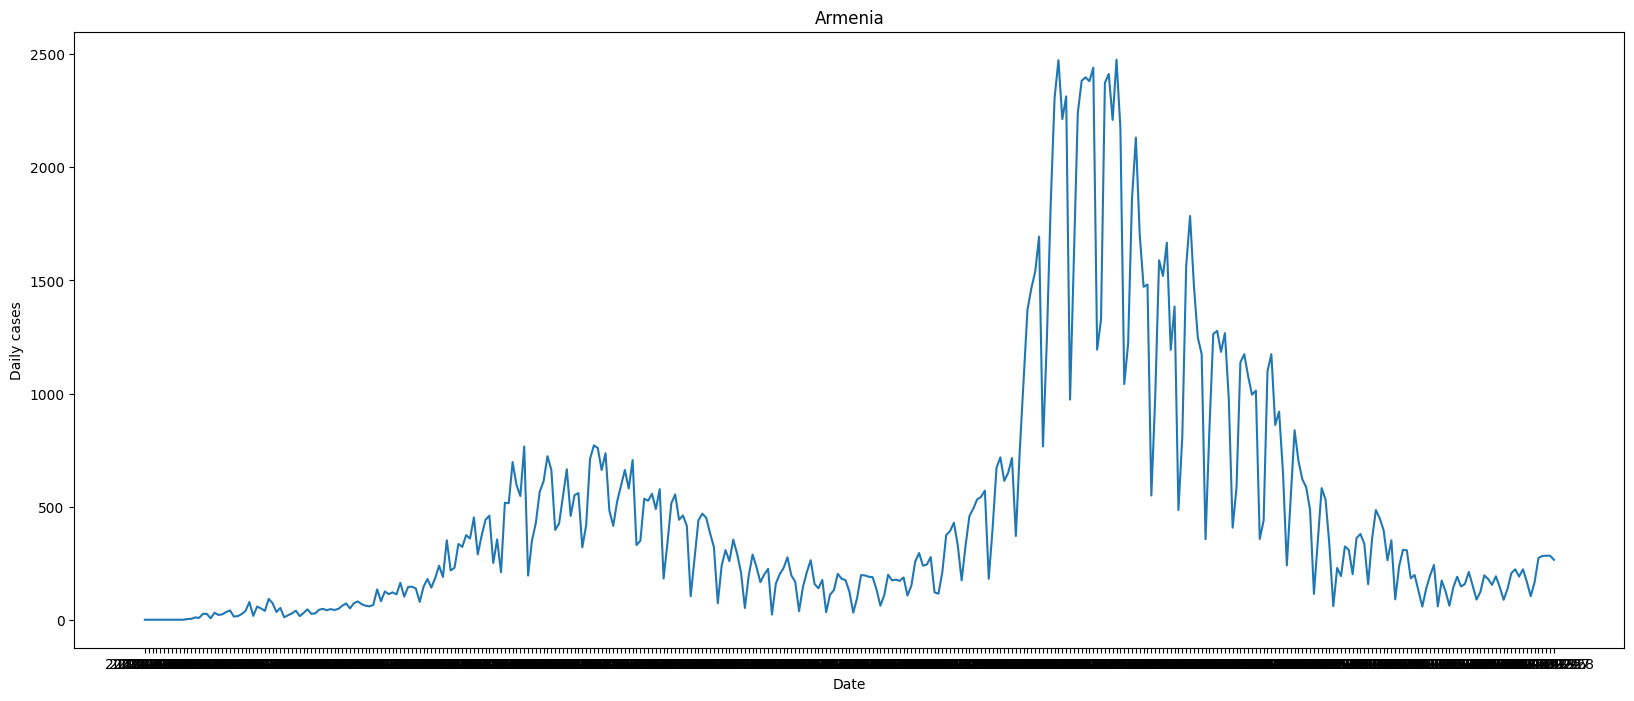

In [13]:
fig, axes = plt.subplots(figsize=(20, 8) )
country,dataframes = rnd.choice(list(data_days_stats.items()))
sns.lineplot(data=dataframes,x=dataframes.index,y='Daily cases').set(title=country)
 

In [14]:
print(data_days_stats['Malta'].head(20))
print(data_days_stats['Malta'].tail(20))

            Daily tests  Cases  Deaths  Daily cases  Daily deaths
Date                                                             
2020-02-25         29.0    0.0     0.0          0.0           0.0
2020-02-26         50.0    0.0     0.0          0.0           0.0
2020-02-27         14.0    0.0     0.0          0.0           0.0
2020-02-28         10.0    0.0     0.0          0.0           0.0
2020-02-29          7.0    0.0     0.0          0.0           0.0
2020-03-01          8.0    0.0     0.0          0.0           0.0
2020-03-02          5.0    0.0     0.0          0.0           0.0
2020-03-03         22.0    0.0     0.0          0.0           0.0
2020-03-04         42.0    0.0     0.0          0.0           0.0
2020-03-05         31.0    0.0     0.0          0.0           0.0
2020-03-06         63.0    0.0     0.0          0.0           0.0
2020-03-07         98.0    3.0     0.0          3.0           0.0
2020-03-08        118.0    3.0     0.0          0.0           0.0
2020-03-09

In [15]:
mean_daily_tests=[]
mean_daily_cases=[]
mean_daily_deaths=[]
for dataframes in data_days_stats.values():
    mean_daily_tests.append(dataframes["Daily tests"].mean())
    mean_daily_cases.append(dataframes['Daily cases'].loc[dataframes["Cases"]>10].mean())
    mean_daily_deaths.append(dataframes['Daily deaths'].loc[dataframes["Cases"]>10].mean())                                                         

In [16]:
countries_stats['Mean daily tests']=mean_daily_tests
#countries_stats['Mean daily cases']=mean_daily_cases
#countries_stats['Mean daily deaths']=mean_daily_deaths



In [17]:
countries_stats.head(10)

,Country,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Mean daily tests
0,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,1170.264865
1,Algeria,Africa,28.03,1.66,25,1.90,1.83,3974.0,41318142,29,6,8.378378
2,Argentina,South America,-38.42,-63.62,14,5.00,3.91,9912.3,44271041,31,11,15085.977723
3,Armenia,Europe,40.07,45.04,11,4.20,2.80,4622.7,2930450,35,11,273.035616
4,Australia,Oceania,-25.27,133.78,22,3.84,3.50,55060.3,24598933,37,16,23341.352500
5,Austria,Europe,47.52,14.55,8,7.37,5.23,50137.7,8809212,44,19,38566.581081
6,Bahrain,Asia,25.93,50.64,27,2.00,0.92,23504.0,1492584,32,2,6934.725067
7,Bangladesh,Asia,23.68,90.36,25,0.80,0.47,1855.7,164669751,27,5,11050.571823
8,Belarus,Europe,53.71,27.95,8,11.00,4.07,6663.3,9507875,40,15,1292.046322
9,Belgium,Europe,50.50,4.47,10,5.64,3.01,46420.7,11372068,41,19,23893.759591


In [18]:
countries_stats[['Mean daily tests']]=countries_stats[['Mean daily tests']].apply(lambda  x:round(x))

In [19]:
#pd.options.display.max_rows=20
#countries_stats.sort_values(by=['Mean daily deaths'],ascending=False)

In [20]:
total_cases=[]
total_deaths=[]
for dataframe in data_days_stats.values():
    total_cases.append(dataframe.loc['2021-02-28','Cases'])
    total_deaths.append(dataframe.loc['2021-02-28','Deaths'])
countries_stats['Total cases']= total_cases  
countries_stats['Total deaths']= total_deaths  

In [21]:
total_tests=[]
for dataframe in data_days_stats.values():
    total_tests.append(dataframe['Daily tests'].sum())
countries_stats['Total tests']= total_tests

In [22]:

countries_stats['Total deaths per total population percentage (%)']=countries_stats['Total deaths']/countries_stats['Population']*100
countries_stats['Total tests per total population percentage (%)']=countries_stats['Total tests']/countries_stats['Population']*100
countries_stats['Covid cases per total population percentage (%)']=countries_stats['Total cases']/countries_stats['Population']*100

In [23]:
countries_stats['Covid positivity of test cases (%)']=countries_stats['Total cases']/countries_stats['Total tests']*100

In [24]:
countries_stats['Covid mortality (%)']=countries_stats['Total deaths']/countries_stats['Total cases']*100

In [25]:
pd.set_option('display.max_rows', 365)
countries_stats.sort_values(by='Covid positivity of test cases (%)')['Covid positivity of test cases (%)'].head(105)

65        0.161830
10        0.170667
59        0.183404
28        0.245854
4         0.310372
101       0.733613
90        0.970739
97        1.294118
22        1.298245
86        1.529132
21        1.603608
29        1.763423
67        1.868256
20        2.130001
83        2.157956
35        2.183557
79        2.383569
52        2.635009
80        2.784202
91        2.951845
5         3.219704
56        3.268075
46        3.565471
87        3.995150
78        4.069349
32        4.097266
6         4.757261
14        5.013482
98        5.025706
55        5.070334
36        5.430033
44        5.664757
62        5.893198
49        6.022853
41        6.035957
40        6.310683
69        6.867964
73        7.061338
26        7.138100
100       7.208629
30        7.273311
95        7.409468
42        7.458018
102       7.520217
27        7.525376
94        8.243842
9         8.258114
92        8.367052
99        8.710484
81        8.815635
16        9.027123
51        9.527302
60        9.

In [26]:
countries_stats.head()

,Country,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Mean daily tests,Total cases,Total deaths,Total tests,Total deaths per total population percentage (%),Total tests per total population percentage (%),Covid cases per total population percentage (%),Covid positivity of test cases (%),Covid mortality (%)
0,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,1170.0,107167.0,1796.0,432998.0,0.062503,15.068887,3.729549,24.749999,1.675889
1,Algeria,Africa,28.03,1.66,25,1.90,1.83,3974.0,41318142,29,6,8.0,113092.0,2983.0,3100.0,0.007220,0.007503,0.273710,3648.129032,2.637676
2,Argentina,South America,-38.42,-63.62,14,5.00,3.91,9912.3,44271041,31,11,15086.0,2107365.0,51965.0,6094735.0,0.117379,13.766866,4.760143,34.576811,2.465876
3,Armenia,Europe,40.07,45.04,11,4.20,2.80,4622.7,2930450,35,11,273.0,172058.0,3192.0,99658.0,0.108925,3.400775,5.871385,172.648458,1.855188
4,Australia,Oceania,-25.27,133.78,22,3.84,3.50,55060.3,24598933,37,16,23341.0,28978.0,909.0,9336541.0,0.003695,37.955065,0.117802,0.310372,3.136862


In [27]:
sns.set_style('whitegrid')


<Axes: xlabel='Covid positivity of test cases (%)', ylabel='Covid mortality (%)'>

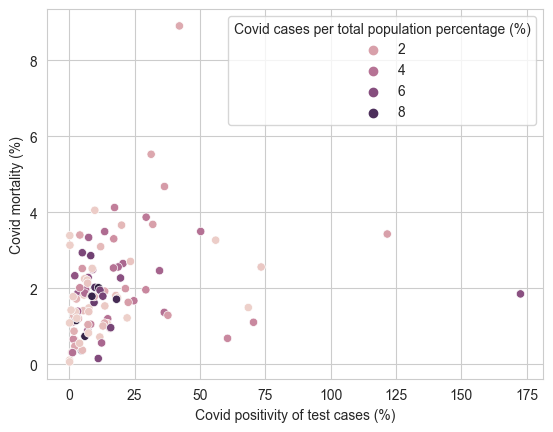

In [28]:
x_column='Covid positivity of test cases (%)'
y_column='Covid mortality (%)'
plot_data=countries_stats.drop(countries_stats[x_column].idxmax())
#plot_data=plot_data.drop(plot_data[y_column].idxmax()) #Use this to delete Mexico for plot visualization, in order to see in more detail the rest of the data
sns.scatterplot(data=plot_data,x=x_column,y=y_column,hue='Covid cases per total population percentage (%)')

<Axes: xlabel='Median age', ylabel='Covid mortality (%)'>

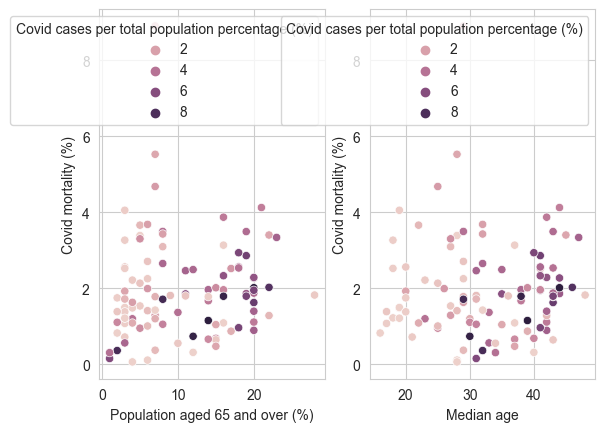

In [29]:
fig, axis =plt.subplots(1,2)
x_column='Population aged 65 and over (%)'
y_column='Covid mortality (%)'
#plot_data=countries_stats.drop(countries_stats[x_column].idxmax())
#plot_data=plot_data.drop(plot_data[y_column].idxmax()) #Use this to delete Mexico for plot visualization, in order to see in more detail the rest of the data
sns.scatterplot(data=plot_data,x=x_column,y=y_column,color='red',hue='Covid cases per total population percentage (%)',ax=axis[0])

x_column='Median age'
y_column='Covid mortality (%)'
#plot_data=countries_stats.drop(countries_stats[x_column].idxmax())
#plot_data=plot_data.drop(plot_data[y_column].idxmax()) #Use this to delete Mexico for plot visualization, in order to see in more detail the rest of the data
sns.scatterplot(data=plot_data,x=x_column,y=y_column,color='red',hue='Covid cases per total population percentage (%)',ax=axis[1])

<Axes: xlabel='Average temperature per year', ylabel='Covid mortality (%)'>

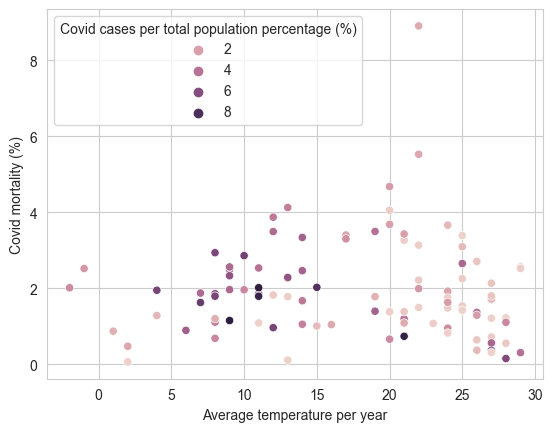

In [30]:
x_column='Average temperature per year'
y_column='Covid mortality (%)'
#plot_data=countries_stats.drop(countries_stats[x_column].idxmax())
#plot_data=plot_data.drop(plot_data[y_column].idxmax()) #Use this to delete Mexico for plot visualization, in order to see in more detail the rest of the data
sns.scatterplot(data=plot_data,x=x_column,y=y_column,color='red',hue='Covid cases per total population percentage (%)')

<Axes: xlabel='Total tests per total population percentage (%)', ylabel='Covid mortality (%)'>

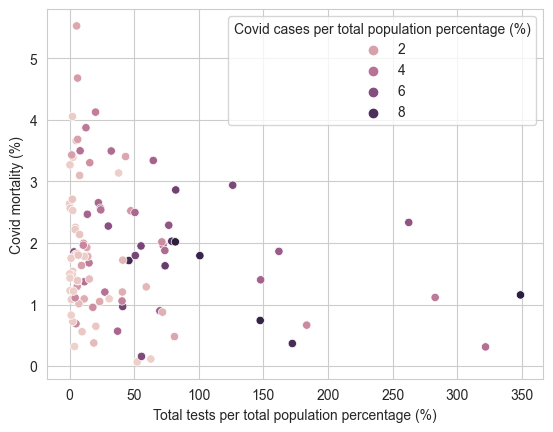

In [39]:
x_column='Total tests per total population percentage (%)'
y_column='Covid mortality (%)'
plot_data=countries_stats
#plot_data=plot_data.drop(plot_data[x_column].idxmax())
#plot_data=plot_data.drop(plot_data[y_column].idxmax()) #Use this to delete Mexico for plot visualization, in order to see in more detail the rest of the data
sns.scatterplot(data=plot_data,x=x_column,y=y_column,color='blue',hue='Covid cases per total population percentage (%)')

<Axes: xlabel='GDP/Capita', ylabel='Covid mortality (%)'>

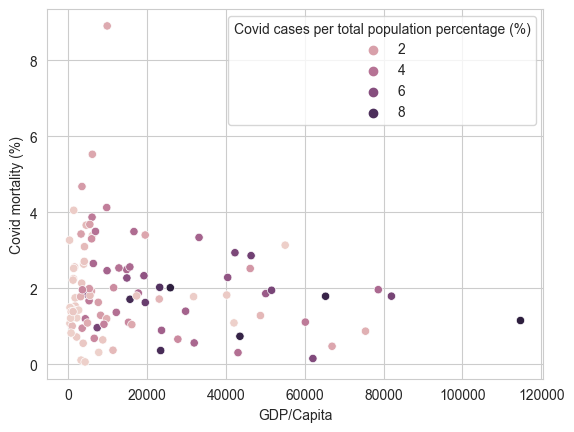

In [32]:
x_column='GDP/Capita'
y_column='Covid mortality (%)'
plot_data=countries_stats
#plot_data=plot_data.drop(plot_data[x_column].idxmax())
#plot_data=plot_data.drop(plot_data[y_column].idxmax()) #Use this to delete Mexico for plot visualization, in order to see in more detail the rest of the data
sns.scatterplot(data=plot_data,x=x_column,y=y_column,color='red',hue='Covid cases per total population percentage (%)')

<Axes: xlabel='Population', ylabel='Covid mortality (%)'>

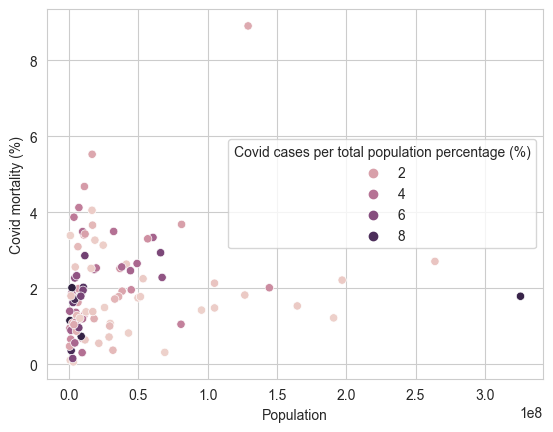

In [33]:
x_column='Population'
y_column='Covid mortality (%)'
plot_data=countries_stats
plot_data=plot_data.drop(plot_data[x_column].idxmax())
#plot_data=plot_data.drop(plot_data[y_column].idxmax()) #Use this to delete Mexico for plot visualization, in order to see in more detail the rest of the data
sns.scatterplot(data=plot_data,x=x_column,y=y_column,color='red',hue='Covid cases per total population percentage (%)')

<Axes: xlabel='Medical doctors per 1000 people', ylabel='Covid mortality (%)'>

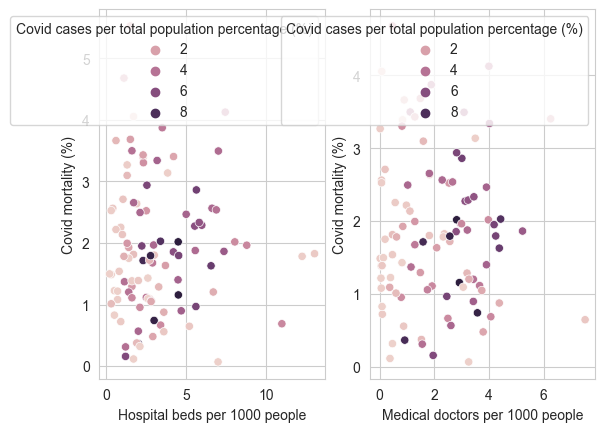

In [34]:
fig, axis =plt.subplots(1,2)
x_column='Hospital beds per 1000 people'
y_column='Covid mortality (%)'
#plot_data=countries_stats.drop(countries_stats[x_column].idxmax())
plot_data=plot_data.drop(plot_data[y_column].idxmax())
sns.scatterplot(data=plot_data,x=x_column,y=y_column,color='red',hue='Covid cases per total population percentage (%)',ax=axis[0])

x_column='Medical doctors per 1000 people'
y_column='Covid mortality (%)'
#plot_data=countries_stats.drop(countries_stats[x_column].idxmax())
plot_data=plot_data.drop(plot_data[y_column].idxmax())
sns.scatterplot(data=plot_data,x=x_column,y=y_column,color='red',hue='Covid cases per total population percentage (%)',ax=axis[1])

<Axes: xlabel='GDP/Capita', ylabel='Total deaths per total population percentage (%)'>

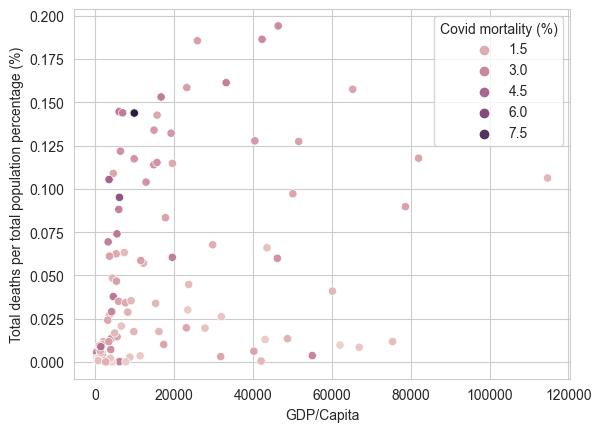

In [40]:
x_column='GDP/Capita'
y_column='Total deaths per total population percentage (%)'
plot_data=countries_stats
#plot_data=plot_data.drop(plot_data[x_column].idxmax())
#plot_data=plot_data.drop(plot_data[y_column].idxmax()) 
sns.scatterplot(data=plot_data,x=x_column,y=y_column,hue='Covid mortality (%)')

In [41]:
countries_stats.sort_values(by=['Hospital beds per 1000 people'],ignore_index=True,ascending=False).head(105)

,Country,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Mean daily tests,Total cases,Total deaths,Total tests,Total deaths per total population percentage (%),Total tests per total population percentage (%),Covid cases per total population percentage (%),Covid positivity of test cases (%),Covid mortality (%)
0,Japan,Asia,36.20,138.25,12,13.05,2.37,40246.9,126785797,48,28,18880.0,432090.0,7889.0,7627688.0,0.006222,6.016201,0.340803,5.664757,1.825777
1,South Korea,Asia,35.91,127.77,13,12.27,2.33,31846.2,51466201,43,14,14574.0,90031.0,1605.0,5887719.0,0.003119,11.439972,0.174932,1.529132,1.782719
2,Belarus,Europe,53.71,27.95,8,11.00,4.07,6663.3,9507875,40,15,1292.0,287306.0,1976.0,474181.0,0.020783,4.987245,3.021769,60.589944,0.687768
3,Ukraine,Europe,48.38,31.17,10,8.80,3.00,3659.0,44831159,41,16,13103.0,1395528.0,27404.0,4756558.0,0.061127,10.609938,3.112853,29.339030,1.963701
4,Russia,Asia,61.52,105.32,-2,8.05,3.98,11585.0,144495044,39,15,261193.0,4198400.0,84700.0,103171283.0,0.058618,71.401261,2.905567,4.069349,2.017435
5,Bulgaria,Europe,42.73,25.49,13,7.45,4.00,9828.1,7075991,44,21,3973.0,247038.0,10191.0,1422194.0,0.144022,20.098867,3.491214,17.370204,4.125276
6,Austria,Europe,47.52,14.55,8,7.37,5.23,50137.7,8809212,44,19,38567.0,459440.0,8561.0,14269635.0,0.097182,161.985374,5.215449,3.219704,1.863355
7,Hungary,Europe,47.16,19.50,12,7.02,3.09,16731.8,9781127,43,19,8713.0,428599.0,14974.0,3154062.0,0.153091,32.246407,4.381898,13.588794,3.493709
8,Mongolia,Asia,46.86,103.85,2,7.00,3.26,4339.8,3075647,28,4,4521.0,2952.0,2.0,1609563.0,0.000065,52.332501,0.095980,0.183404,0.067751
9,Romania,Europe,45.94,24.97,11,6.89,2.67,12919.5,19586539,43,18,12824.0,801994.0,20350.0,4732128.0,0.103898,24.160103,4.094618,16.947851,2.537425
